In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import gc

from matplotlib import rcParams
# rcParams['axes.titlepad'] = 12
rcParams['font.weight'] ='bold'
rcParams['legend.fontsize'] = 16

In [2]:
profile_1 = pd.ExcelFile("../data/vert_profile_plot_data_NEW.xlsx").parse("profile_1", headers=None, skiprows=1)
profile_1.columns = ["pres", "hgt", "temp"]
profile_1["hgt"] = profile_1["hgt"].div(1000.0)
# profile_1_lr = pd.ExcelFile("../data/copied_dir/delhi/manual_test_10_Aug_2001.xlsx").parse("manual_test", usecols=['height','lapse_rate'])
# profile_1_lr.dropna(inplace=True)
# profile_1_lr["height"] = profile_1_lr["height"] / 1000.0

profile_2 = pd.ExcelFile("../data/vert_profile_plot_data_NEW.xlsx").parse("profile_2", headers=None, skiprows=1)
profile_2.columns = ["pres", "hgt", "temp"]
profile_2["hgt"] = profile_2["hgt"].div(1000.0)
# profile_2_lr = pd.ExcelFile("../data/copied_dir/nagpur/manual_test.xlsx").parse("manual_test", usecols=['height','lapse_rate'])
# profile_2_lr.dropna(inplace=True)
# profile_2_lr["height"] = profile_2_lr["height"] / 1000.0

In [3]:
profile_1

pres     hgt  temp
0   980.0   0.216  11.8
1   966.0   0.351  13.2
2   958.0   0.429  14.0
3   956.0   0.449  14.2
4   943.0   0.577  13.6
5   925.0   0.758  12.8
6   850.0   1.461   6.8
7   812.0   1.835   3.4
8   737.0   2.614  -0.5
9   700.0   3.028  -2.5
10  688.0   3.165  -3.3
11  677.0   3.292  -3.6
12  633.0   3.822  -4.7
13  611.0   4.097  -6.2
14  566.0   4.693  -9.4
15  552.0   4.887 -10.5
16  526.0   5.254 -13.2
17  523.0   5.298 -13.6
18  500.0   5.640 -16.1
19  437.0   6.643 -23.2
20  425.0   6.850 -24.7
21  422.0   6.901 -25.1
22  403.0   7.236 -28.1
23  400.0   7.290 -28.5
24  379.0   7.668 -31.8
25  335.0   8.534 -39.3
26  318.0   8.888 -42.5
27  300.0   9.280 -44.9
28  286.0   9.594 -47.1
29  268.0  10.021 -50.1
30  250.0  10.470 -53.1
31  222.0  11.226 -58.1
32  206.0  11.702 -54.5
33  200.0  11.890 -53.1
34  199.0  11.922 -52.9
35  186.0  12.354 -54.2
36  160.0  13.317 -57.2
37  150.0  13.730 -58.5
38  134.0  14.431 -60.0
39  125.0  14.864 -61.0
40  115.0  15.382 -62.1
41  100.0  16.230 -68.9
42   89.5  16.887 -71.3
43   85.0  17.195 -69.6
44   83.0  17.337 -68.8
45   78.0  17.709 -66.8
46   74.0  18.024 -65.1
47   73.5  18.064 -64.9
48   70.0  18.360 -65.5
49   67.0  18.627 -65.7
50   64.2  18.888 -65.9
51   61.7  19.131 -64.5
52   61.0  19.202 -61.6
53   60.7  19.233 -60.3
54   55.0  19.842 -63.5
55   50.0  20.430 -66.5
56   49.6  20.479 -65.9

In [4]:
def log_10_product(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    return '%1i' % (x)

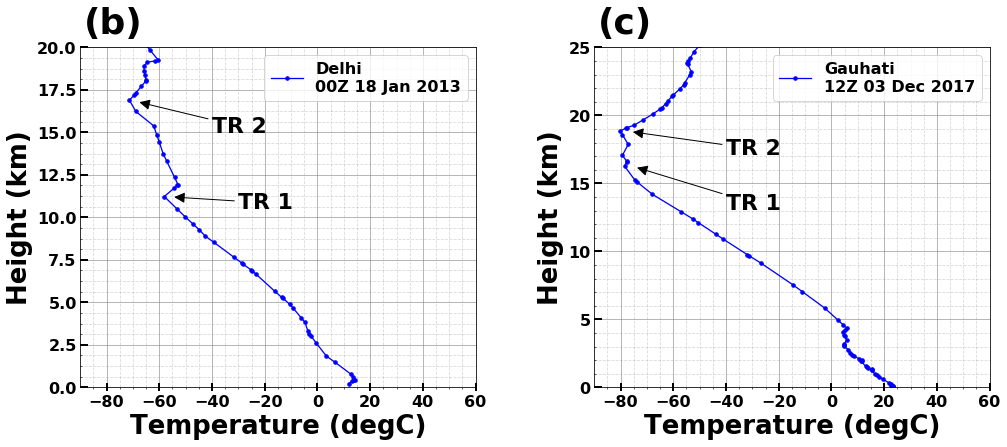

In [5]:
import matplotlib.patches as mpatches
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8), sharex=False, sharey=False)

# right_axis = axes[0].twinx()
lineplot = profile_1.plot.line(label="Delhi\n00Z 18 Jan 2013", color='blue', linewidth=1.3, ax=axes[0],
              x="temp", y="hgt", markersize=7, marker='.')
# top_axis = axes[0].twiny()
# lr_lineplot = profile_1_lr.plot.line(legend=None, color='red', linewidth=1.3, ax=top_axis,
#               x="lapse_rate", y="height")
# top_axis.tick_params(axis='x', which='major')
# top_axis.set_xlim([-25, 40])
# top_axis.set_xlabel("Lapse Rate (degC/km)", fontsize=26, fontweight='bold')
# top_axis.tick_params(axis='y', which='both', left='off', labelleft='off')
# top_axis.tick_params(axis='x', direction='in', width=2, length=8, labelsize=16, which="major")
axes[0].legend(loc='upper right')
axes[0].set_xlim((-90,60))
axes[0].set_ylim((0,20))
axes[0].tick_params(axis='y', direction='in', width=2, length=8, labelsize=16, which="major")
axes[0].tick_params(axis='y', direction='in', which="minor")
axes[0].tick_params(axis='x', direction='inout', width=2, length=8, labelsize=16)
axes[0].set_xlabel("Temperature (degC)", fontsize=26, fontweight='bold')
axes[0].set_ylabel("Height (km)", fontsize=26, fontweight='bold')
axes[0].grid(b=True, which='major', color='grey', linestyle='-', alpha=0.7)
axes[0].grid(b=True, which='minor', color='grey', linestyle='--', alpha=0.3)
axes[0].minorticks_on()
# right_axis.tick_params(axis='y', direction='in', width=2, length=8, labelsize=16)
# right_axis.set_ylabel("Pressure (hPa)", labelpad=25, fontsize=26, rotation=-90, fontweight='bold')
# right_axis.set_yscale('log')
# right_axis.set_ylim([19, 1000])
# right_axis.invert_yaxis()
# right_axis.yaxis.set_major_formatter(plt.FuncFormatter(log_10_product))
# right_axis.yaxis.set_minor_formatter(plt.FuncFormatter(log_10_product))
# right_axis.set_yticks([20, 50, 100, 250, 500, 1000])
# right_axis.minorticks_off()
# 42182	00Z 18 Jan 2013	11200	-58.1	16800	-71.3
axes[0].annotate("TR 1", xy=(-55.1, 11.2), xytext=(-30, 10.5), arrowprops=dict(arrowstyle="-|>", 
                color='black'), fontsize=22, fontweight='bold')
axes[0].annotate("TR 2", xy=(-68.3, 16.8), xytext=(-40, 15.0), arrowprops=dict(arrowstyle="-|>", 
                color='black'), fontsize=22, fontweight='bold')
plt.text(0.01, 1.04, "(b)", horizontalalignment='left', fontsize=36,
         transform=axes[0].transAxes, fontweight='bold')

# --------------------------------------------------------------------------------------------------------

# right_axis = axes[1].twinx()
lineplot = profile_2.plot.line(label="Gauhati\n12Z 03 Dec 2017", color='blue', linewidth=1.3, ax=axes[1],
              x="temp", y="hgt", markersize=7, marker='.')
# top_axis = axes[1].twiny()
# lr_lineplot = profile_2_lr.plot.line(legend=None, color='red', linewidth=1.3, ax=top_axis,
#               x="lapse_rate", y="height")
# top_axis.tick_params(axis='x', which='major')
# top_axis.set_xlim([-25, 25])
# top_axis.set_xlabel("Lapse Rate (degC/km)", fontsize=26, fontweight='bold')
# top_axis.tick_params(axis='y', left='on', which='both', labelleft='off')
# top_axis.tick_params(axis='x', direction='in', width=2, length=8, labelsize=16, which="major")

axes[1].legend(loc='upper right')
axes[1].set_xlim((-90,60))
axes[1].set_ylim((0,25))
axes[1].tick_params(axis='y', direction='in', width=2, length=8, labelsize=16, which="major")
axes[1].tick_params(axis='y', direction='in', which="minor")
axes[1].tick_params(axis='x', direction='inout', width=2, length=8, labelsize=16)
axes[1].set_xlabel("Temperature (degC)", fontsize=26, fontweight='bold')
axes[1].set_ylabel("Height (km)", fontsize=26, fontweight='bold')
axes[1].grid(b=True, which='major', color='grey', linestyle='-', alpha=0.7)
axes[1].grid(b=True, which='minor', color='grey', linestyle='--', alpha=0.3)
axes[1].minorticks_on()
# right_axis.tick_params(axis='y', direction='in', width=2, length=8, labelsize=16)
# right_axis.set_ylabel("Pressure (hPa)", labelpad=25, fontsize=26, rotation=-90, fontweight='bold')
# right_axis.set_yscale('log')
# right_axis.set_ylim([24.2, 1000])
# right_axis.invert_yaxis()
# right_axis.yaxis.set_major_formatter(plt.FuncFormatter(log_10_product))
# right_axis.yaxis.set_minor_formatter(plt.FuncFormatter(log_10_product))
# right_axis.set_yticks([50, 100, 250, 500, 1000])
# right_axis.minorticks_off()
# 42410	12Z 03 Dec 2017	16200	-78.5	18800	-80.1
axes[1].annotate("TR 1", xy=(-74.5, 16.2), xytext=(-40, 13.1), arrowprops=dict(arrowstyle="-|>", 
                color='black'), fontsize=22, fontweight='bold')
axes[1].annotate("TR 2", xy=(-76.1, 18.8), xytext=(-40, 17.1), arrowprops=dict(arrowstyle="-|>", 
                color='black'), fontsize=22, fontweight='bold')
plt.text(0.01, 1.04, "(c)", horizontalalignment='left', fontsize=36,
         transform=axes[1].transAxes, fontweight='bold')



# plt.suptitle('Vertical Temperature Profiles', fontsize=30, fontweight='bold')
plt.tight_layout()
fig.subplots_adjust(wspace=0.30, top=0.70)
plt.savefig("../plots/vertical_temp_profile.png", bbox_inches='tight', pad_inches = 0.5, dpi = 200)
# plt.show()